<a href="https://colab.research.google.com/github/Jonaslbb/Organizational-network-analysis/blob/main/Notebook/Network%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to colab document
https://colab.research.google.com/drive/17YGyuhTqXVLC5YII8NzwYXOTgliI321i?usp=sharing

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading the different datasets
# Adding sep = " ", to get the values in different columns
attributes = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-Attributes.csv")
advice = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-edgelist-Advice.txt",sep=" ",header=None)
friendship = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-edgelist-Friendship.txt",sep=" ", header=None)
reports = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-edgelist-ReportsTo.txt",sep=" ",header=None)

In [ ]:
# These are the attributes of the nodes
attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      21 non-null     int64  
 1   AGE     21 non-null     int64  
 2   TENURE  21 non-null     float64
 3   LEVEL   21 non-null     int64  
 4   DEPT    21 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 968.0 bytes


In [ ]:
# These are the columns of advice. The first column isn't really included in the dataset but got added because of the way i loaded the dataset.
advice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       0 non-null      float64
 1   1       441 non-null    int64  
 2   2       441 non-null    int64  
 3   3       441 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 13.9 KB


# Cleaning of data

In [ ]:
# Changing the column names. 
advice = advice.rename(columns={0: "remove", 1: "ego",2:"alter",3:"edges"})
friendship = friendship.rename(columns={0: "remove", 1: "ego",2:"alter",3:"edges"})
reports = reports.rename(columns={0: "remove", 1: "ego",2:"alter",3:"edges"})

In [ ]:
# Removing the extra column which got added by mistake and dosn't hold any information
advice = advice.drop(columns="remove")
friendship = friendship.drop(columns="remove")
reports = reports.drop(columns="remove")

In [ ]:
# The column "edges" returns 1 if there is a edge. Since we are only interested in the edges, we remove all data with 0 in the edges column
advice = advice[advice["edges"] != 0]
friendship = friendship[friendship["edges"] != 0]
reports = reports[reports["edges"] != 0]

In [ ]:
# Now we only got the edges left
advice

,ego,alter,edges
1,1,2,1
3,1,4,1
7,1,8,1
15,1,16,1
17,1,18,1
...,...,...,...
431,21,12,1
433,21,14,1
436,21,17,1
437,21,18,1


# 1. Create a network

In [ ]:
# Making a DiGraph from each of the 3 edgelists. I'm using a DiGraph since all the data is dicreted. 
# Directed data means that all the edges goes from someone to someone else, and the connction dosn't go both ways.
G_advice = nx.from_pandas_edgelist(advice, source="ego",target="alter",create_using=nx.DiGraph)
G_friendship = nx.from_pandas_edgelist(friendship, source="ego",target="alter",create_using=nx.DiGraph)
G_reports = nx.from_pandas_edgelist(reports, source="ego",target="alter",create_using=nx.DiGraph)

In [ ]:
# Now the data is in edgelist format. the first value is where the edge is coming from and the second is where the edge is going.
G_advice.edges

In [ ]:
# Preparing the attributes 
node_attr = attributes.set_index('ID').to_dict('index')

In [ ]:
# Adding the attributes to each node. Now each node includes a value for ID, AGE, TENURE, DEPT and LEVEL
nx.set_node_attributes(G_advice, node_attr)
nx.set_node_attributes(G_friendship, node_attr)
nx.set_node_attributes(G_reports, node_attr)

In [ ]:
# Making sure that the attributes are added correctly to the nodes
G_advice.nodes(data=True)

NodeDataView({1: {'AGE': 33, 'TENURE': 9.333, 'LEVEL': 3, 'DEPT': 4}, 2: {'AGE': 42, 'TENURE': 19.583, 'LEVEL': 2, 'DEPT': 4}, 4: {'AGE': 33, 'TENURE': 7.5, 'LEVEL': 3, 'DEPT': 4}, 8: {'AGE': 34, 'TENURE': 11.333, 'LEVEL': 3, 'DEPT': 1}, 16: {'AGE': 27, 'TENURE': 4.667, 'LEVEL': 3, 'DEPT': 4}, 18: {'AGE': 33, 'TENURE': 9.083, 'LEVEL': 2, 'DEPT': 3}, 21: {'AGE': 36, 'TENURE': 12.5, 'LEVEL': 2, 'DEPT': 1}, 6: {'AGE': 59, 'TENURE': 28.0, 'LEVEL': 3, 'DEPT': 1}, 7: {'AGE': 55, 'TENURE': 30.0, 'LEVEL': 1, 'DEPT': 0}, 3: {'AGE': 40, 'TENURE': 12.75, 'LEVEL': 3, 'DEPT': 2}, 9: {'AGE': 62, 'TENURE': 5.417000000000001, 'LEVEL': 3, 'DEPT': 2}, 10: {'AGE': 37, 'TENURE': 9.25, 'LEVEL': 3, 'DEPT': 3}, 11: {'AGE': 46, 'TENURE': 27.0, 'LEVEL': 3, 'DEPT': 3}, 12: {'AGE': 34, 'TENURE': 8.917, 'LEVEL': 3, 'DEPT': 1}, 14: {'AGE': 43, 'TENURE': 10.417, 'LEVEL': 2, 'DEPT': 2}, 17: {'AGE': 30, 'TENURE': 12.417, 'LEVEL': 3, 'DEPT': 1}, 20: {'AGE': 38, 'TENURE': 11.667, 'LEVEL': 3, 'DEPT': 2}, 5: {'AGE': 32, 

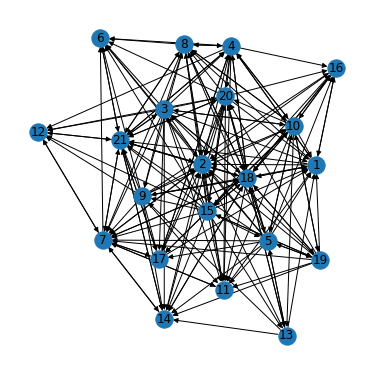

In [ ]:
# Plotting the advice graph.
# It shows that most people are giving a fair bit of advice. Otherwise it's a bit difficult to get any usefull information from this.
plt.figure(figsize=(5,5)) 
nx.draw_kamada_kawai(G_advice, with_labels = True)

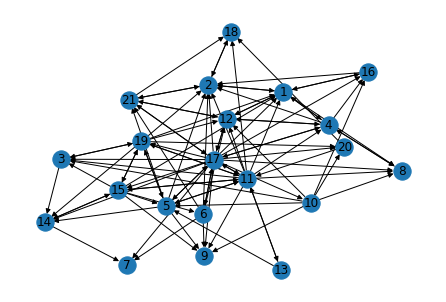

In [ ]:
# Fewer edges than previous plot. People are clearly more likely to give advice than being friends
nx.draw_kamada_kawai(G_friendship, with_labels = True)

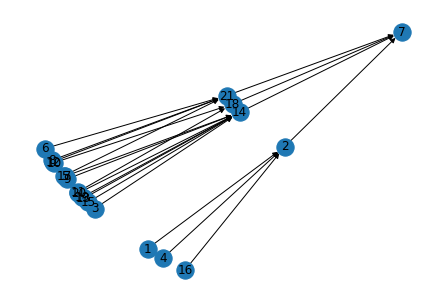

In [ ]:
# This is more of a hierarchical plot, which makes sense since each person report to only one other person.
nx.draw_kamada_kawai(G_reports, with_labels = True)

In [ ]:
# From the previous plot it's clear that person 7 is important. Everyone reports to him either directly or indirectly.
# By finding the attributes of this node, we can see that this persons DEPT is 0, which mean that this is the CEO.
G_reports.nodes()[7]

{'AGE': 55, 'DEPT': 0, 'LEVEL': 1, 'TENURE': 30.0}

# Analysis

#A: Network level characteristics

#Density

In [ ]:
# Density shows how many edges there actually is relativly to the possible amount of edges.
# If everyone are connected to everyone the value will be 1
# In this case a manager will in average give advice to 45% of the other managers
nx.density(G_advice)

0.4523809523809524

In [ ]:
# As shown in the plot earlier, these managers are more likely to be friends than give advice
nx.density(G_friendship)

0.24285714285714285

In [ ]:
# The density is very low for reports, which makes sense since each person only reports to one other person
nx.density(G_reports)

0.047619047619047616

The employees are generally more likely to be in a advice seeknig relationship. This is shown by the density of the advice network beeing higher than in the friendship network

# Transitivity

In [ ]:
# Transitivity shows how many "triangles are closed". Basically when three people are all connected to eachother.
# If the number is high it means that people tend to cluster together, or the network just has a high density in genral.
nx.transitivity(G_advice)

0.4651600753295669

In [ ]:
nx.transitivity(G_friendship)

0.27581863979848864

In [ ]:
# This is 0 which makes sense because each person only reports to one, so it can never make a triangle
nx.transitivity(G_reports)

0

Friends of your friends is not necessarily your friends. Transitivity of the friendship network is 0.28, so these "triangle" friendships are not accruing that often.

#Reciprocity

In [ ]:
# Reciprocity shows how often an edge goes both ways, eg. (1,2) and (2,1).
nx.reciprocity(G_advice)

0.47368421052631576

In [ ]:
nx.reciprocity(G_friendship)

0.45098039215686275

In [ ]:
nx.reciprocity(G_reports)

0.0

Most frindships and advice seeking relationships do not go both ways. In friendship network 45% of the edges go both ways, and in advice seeking relationships it's 47% of the edges

#B: Node level characteristics

Who is most popular in the networks. Who is the most wanted friend, and
advice giver?

In [ ]:
# These are all the nodes and how many edges going to this node
G_friendship.in_degree

InDegreeView({1: 8, 2: 10, 4: 5, 8: 5, 12: 8, 16: 4, 18: 4, 21: 5, 3: 5, 14: 5, 19: 5, 17: 6, 5: 6, 9: 6, 11: 6, 6: 2, 7: 3, 10: 1, 20: 3, 13: 1, 15: 4})

In [ ]:
# This picks the node with the highest number of incoming edges. in this case it's node 2 which have 10 incoming edges.
# This makes person 2 the most wanted friend.
max(dict(G_friendship.in_degree()).items(), key = lambda x : x[1])

(2, 10)

In [ ]:
# This show all the nodes and how many advice they are giving out.
G_advice.out_degree

OutDegreeView({1: 6, 2: 3, 4: 12, 8: 8, 16: 4, 18: 17, 21: 11, 6: 1, 7: 8, 3: 15, 9: 13, 10: 14, 11: 3, 12: 2, 14: 4, 17: 5, 20: 12, 5: 15, 13: 6, 19: 11, 15: 20})

In [ ]:
# Node 15 is giving advices to 20 different nodes which is everyone. So he is the most wanted advice giver.
max(dict(G_advice.out_degree()).items(), key = lambda x : x[1])

(15, 20)

Are managers in higher hirarchy more popular as friend, and advice giver?

In [ ]:
# Finding all the nodes in LEVEL 2
[x for x,y in G_advice.nodes(data=True) if y['LEVEL']==2]

[2, 18, 21, 14]

In [ ]:
# The amount of edges to or from the different nodes
G_advice.degree

DiDegreeView({1: 19, 2: 21, 4: 20, 8: 18, 16: 12, 18: 32, 21: 26, 6: 11, 7: 21, 3: 20, 9: 17, 10: 23, 11: 14, 12: 9, 14: 14, 17: 14, 20: 20, 5: 20, 13: 10, 19: 15, 15: 24})

In [ ]:
G_friendship.degree

DiDegreeView({1: 13, 2: 13, 4: 11, 8: 6, 12: 12, 16: 6, 18: 5, 21: 9, 3: 7, 14: 7, 19: 14, 17: 24, 5: 13, 9: 6, 11: 19, 6: 8, 7: 3, 10: 8, 20: 5, 13: 3, 15: 12})

I coudn't get any code to work for this one. I know how to find the nodes of each lvl, and i know how to find the degree of each node ( as shown above). I could use that to manually find the mean of each lvl, but i feels like such a stupid workaround

# C: Relational Characteristics

Are managers from the same 1. department, or on the same 2. hirarchy, 3.
age, or 4. tenuere more likely to become friends or give advice?

Assortativity_coefficient basically show to which degree connected nodes share the same attributes

In [ ]:
nx.numeric_assortativity_coefficient(G_advice,attribute="LEVEL")

0.05539744799972084

In [ ]:
nx.numeric_assortativity_coefficient(G_friendship,attribute="LEVEL")

0.25924465704772787

People at the same level seems to be friends more often. They also give advices more often, but only slightly

In [ ]:
nx.numeric_assortativity_coefficient(G_advice,attribute="DEPT")

0.10758708813005802

In [ ]:
nx.numeric_assortativity_coefficient(G_friendship,attribute="DEPT")

0.15115771141070272

People from the same departments seems to give advice to eachother more often and they are also more often friends

In [ ]:
nx.numeric_assortativity_coefficient(G_advice,attribute="AGE")

0.038759800643935395

In [ ]:
nx.numeric_assortativity_coefficient(G_friendship,attribute="AGE")

0.10028705775002852

People of the same age are slightly more inclined to give a advices to eachother, and a bit more likely to be friends

In [ ]:
nx.attribute_assortativity_coefficient(G_advice,attribute="TENURE")

-0.045709982040437976

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship,attribute="TENURE")

-0.05271678640089042

People with similar tenure are actually less likely to give advice or be friends with eachother

# 3. Aggregated networks

I start by loading the data again, just to start over. This is done to prevent making 20 different dataframes with different names.
The first code is the same as earlier

In [ ]:
attributes = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-Attributes.csv")
advice = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-edgelist-Advice.txt",sep=" ",header=None)
friendship = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-edgelist-Friendship.txt",sep=" ", header=None)
reports = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-edgelist-ReportsTo.txt",sep=" ",header=None)

In [ ]:
advice = advice.rename(columns={0: "remove", 1: "ego",2:"alter",3:"edges"})
friendship = friendship.rename(columns={0: "remove", 1: "ego",2:"alter",3:"edges"})
reports = reports.rename(columns={0: "remove", 1: "ego",2:"alter",3:"edges"})

In [ ]:
advice = advice.drop(columns="remove")
friendship = friendship.drop(columns="remove")
reports = reports.drop(columns="remove")

In [ ]:
advice = advice[advice["edges"] != 0]
friendship = friendship[friendship["edges"] != 0]
reports = reports[reports["edges"] != 0]

In [ ]:
# In this task we want to categorize every node by department. We make a mapper which include the departmant of every node, and aline it with the ID.
mapper = dict(enumerate(attributes.DEPT,1))

In [ ]:
mapper

{1: 4,
 2: 4,
 3: 2,
 4: 4,
 5: 2,
 6: 1,
 7: 0,
 8: 1,
 9: 2,
 10: 3,
 11: 3,
 12: 1,
 13: 2,
 14: 2,
 15: 2,
 16: 4,
 17: 1,
 18: 3,
 19: 2,
 20: 2,
 21: 1}

In [ ]:
# Now we use the mapper to change the values of our advice and friendship edges. Every "ego" value is changed from ID to the department of the node.
advice = advice.replace({"ego":mapper}) 
friendship = friendship.replace({"ego":mapper})


In [ ]:
# Same but with "alter"
advice = advice.replace({"alter":mapper}) 
friendship = friendship.replace({"alter":mapper}) 

In [ ]:
# now our ego and alter values are department and not ID
advice

,ego,alter,edges
1,4,4,1
3,4,4,1
7,4,1,1
15,4,4,1
17,4,3,1
...,...,...,...
431,1,1,1
433,1,2,1
436,1,1,1
437,1,3,1


In [ ]:
# Since a lot of the edges are from and to the same department, we remove all edges inside the same department, eg. (4,4)
advice = advice[advice["ego"] !=advice["alter"]]

In [ ]:
# Creating edgelist from the dataframe - same as before.
G_advice = nx.from_pandas_edgelist(advice, source="ego",target="alter",create_using=nx.DiGraph)
G_friendship = nx.from_pandas_edgelist(friendship, source="ego",target="alter",create_using=nx.DiGraph)
node_attr = attributes.set_index('ID').to_dict('index')

In [ ]:
nx.set_node_attributes(G_advice, node_attr)
nx.set_node_attributes(G_friendship, node_attr)

In [ ]:
# The density of the aggregated advice networks is 1, which means that every node is connecet eachother. 
# This makes sense since the network is much smaller now with only 5 nodes, and every node has at least 1 edge to every other node.
nx.density(G_advice)

1.0

In [ ]:
# Transitivty is also 1. When every node is connected it will automaticly make all possible triangels which explains why we get the maximum value of 1
nx.transitivity(G_advice)

1.0

In [ ]:
# Edges go both ways between all of the different departments
nx.reciprocity(G_advice)

1.0

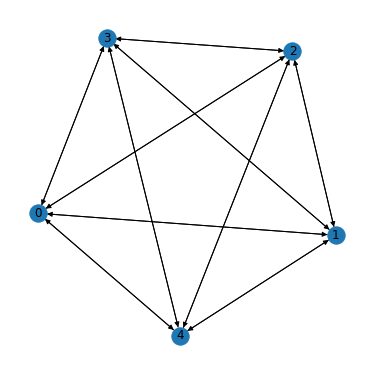

In [ ]:
plt.figure(figsize=(5,5)) 
nx.draw(G_advice, with_labels = True)

In [ ]:
# The density of the friendship network is a bit lower. This is mostly because 0 (CEO), who dosn't consider any of the other managers as friends
nx.density(G_friendship)

0.85

In [ ]:
# Transitivity is also lower, which again is caused by the CEO not cosidering the other managers as friends
nx.transitivity(G_friendship)

0.625

In [ ]:
# Reciprocity is lower as well since the CEO dosn't consider anyone friends, and none from departmant 4 consider anyone from department 2 a friend.
nx.reciprocity(G_friendship)

0.5882352941176471

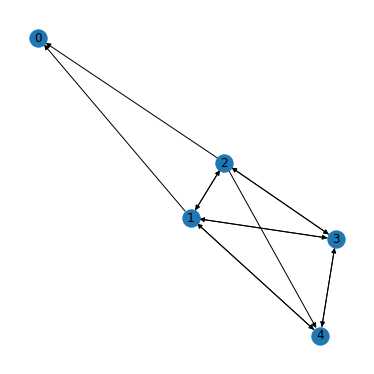

In [ ]:
plt.figure(figsize=(5,5)) 
nx.draw(G_friendship, with_labels = True)

To get a more informative plot we will add weight to the edges

In [ ]:
# Edges are added by the times they accour
advice_weight = advice.value_counts().reset_index(name='weight')

In [ ]:
advice_weight

,ego,alter,edges,weight
0,2,1,1,25
1,2,4,1,21
2,2,3,1,19
3,3,2,1,14
4,3,4,1,10
5,4,1,1,9
6,1,4,1,7
7,2,0,1,6
8,4,3,1,6
9,3,1,1,4


In [ ]:
# Creating a new edgelist with "weight" as attribute
G_advice_weight = nx.from_pandas_edgelist(advice_weight, source='ego', target='alter', edge_attr='weight',create_using=nx.DiGraph)

In [ ]:
G_advice_weight.edges(data=True)

OutEdgeDataView([(2, 1, {'weight': 25}), (2, 4, {'weight': 21}), (2, 3, {'weight': 19}), (2, 0, {'weight': 6}), (1, 4, {'weight': 7}), (1, 3, {'weight': 4}), (1, 0, {'weight': 4}), (1, 2, {'weight': 3}), (4, 1, {'weight': 9}), (4, 3, {'weight': 6}), (4, 2, {'weight': 1}), (4, 0, {'weight': 1}), (3, 2, {'weight': 14}), (3, 4, {'weight': 10}), (3, 1, {'weight': 4}), (3, 0, {'weight': 2}), (0, 1, {'weight': 4}), (0, 3, {'weight': 2}), (0, 4, {'weight': 1}), (0, 2, {'weight': 1})])

In [ ]:
labels = nx.get_edge_attributes(G_advice_weight,'weight')

In [ ]:
pos = nx.spring_layout(G_advice_weight)

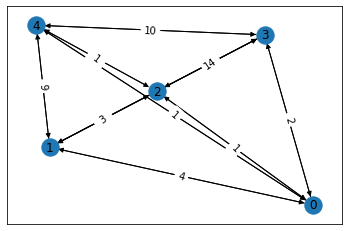

In [ ]:
# Same plot as before, but with labels(weight) on the edges. It's a bit more informative now.
nx.draw_networkx_edge_labels(G_advice_weight, pos=pos, edge_labels = labels)
nx.draw_networkx(G_advice_weight, pos=pos)

# 4 Visualization

Once again i load the datasets and clean the data, just to start over and erase the changes i have made earlier

In [ ]:
attributes = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-Attributes.csv")
advice = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-edgelist-Advice.txt",sep=" ",header=None)
friendship = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-edgelist-Friendship.txt",sep=" ", header=None)
reports = pd.read_csv("https://raw.githubusercontent.com/SDS-AAU/SDS-master/master/00_data/network_krackhard/Krack-High-Tec-edgelist-ReportsTo.txt",sep=" ",header=None)

In [ ]:
advice = advice.rename(columns={0: "remove", 1: "ego",2:"alter",3:"edges"})
friendship = friendship.rename(columns={0: "remove", 1: "ego",2:"alter",3:"edges"})
reports = reports.rename(columns={0: "remove", 1: "ego",2:"alter",3:"edges"})

In [ ]:
advice = advice.drop(columns="remove")
friendship = friendship.drop(columns="remove")
reports = reports.drop(columns="remove")

In [ ]:
advice = advice[advice["edges"] != 0]
friendship = friendship[friendship["edges"] != 0]
reports = reports[reports["edges"] != 0]

In [ ]:
# communuity is a bit like clustering. I want to cluster the different nodes, and use it in a interactive plot
import community as community_louvain

In [ ]:
# I'll only be using the advice network in this task, but i would be the same with friendships
G_community = nx.from_pandas_edgelist(advice, source='ego', target='alter')

In [ ]:
# Centrality degree is based on how many nodes it's connected to
# Eigenvector centrality is based on how many nodes you are connected to, but also how important these other nodes are to the network.
# Betweenness centrality is based on how often the node is part of the shortest path between two nodes
centrality_dgr = nx.degree_centrality(G_community)
centrality_eigen = nx.eigenvector_centrality_numpy(G_community)
centrality_between = nx.betweenness_centrality(G_community)

In [ ]:
# Adding these 3 new attributes, and also the attributes from the dataset (Age,Tenure,Dept,LEVEL)
nx.set_node_attributes(G_community, centrality_dgr, 'centrality_dgr')
nx.set_node_attributes(G_community, centrality_eigen, 'centrality_eigen')
nx.set_node_attributes(G_community, centrality_between, 'centrality_between')
nx.set_node_attributes(G_community,node_attr)

In [ ]:
partition = community_louvain.best_partition(G_community)

In [ ]:
nx.set_node_attributes(G_community, partition, 'community')

In [ ]:
!pip install -qq holoviews
!pip install -qq -U bokeh
!pip install -qq datashader

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
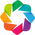

In [ ]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))


In [ ]:
# Create and save a layout.
g_layout = nx.layout.spring_layout(G_community) 
g_plot = hv.Graph.from_networkx(G_community, g_layout).opts(tools=['hover'], node_color='DEPT')
labels = hv.Labels(g_plot.nodes, ['x', 'y'], 'index')

In [ ]:
from holoviews.operation.datashader import datashade, bundle_graph
bundled = bundle_graph(g_plot)

In [ ]:
show(hv.render(bundled * labels.opts(text_font_size='6pt', text_color='red', bgcolor='gray')))

This only really makes sense in colab
https://colab.research.google.com/drive/17YGyuhTqXVLC5YII8NzwYXOTgliI321i?usp=sharing

This is a interactive graph. When you hover over a node it shows all the edges and all the attributes of the node. The graph is colored by department, and it's clear that departments are generally clustered together.
The most central nodes will genrally have more edges, and if you hover over them you can see that they generally score higher in the relevant attributes.

In [ ]:
!jupyter nbconvert --to html "/content/Networks_M2A1 - Done.ipynb"

[NbConvertApp] Converting notebook /content/Networks_M2A1 - Done.ipynb to html
[NbConvertApp] Writing 2525042 bytes to /content/Networks_M2A1 - Done.html
